Objective: Train a classification model to predict late_delivery_risk. We'll use a Random Forest model because it's powerful and provides insights into which factors are most important.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load the feature-engineered data
df = pd.read_csv('../data/processed/final_features.csv')

In [2]:
# Define the target variable
target = 'late_delivery_risk'
y = df[target]

# Select features for the model
# We choose columns that are known before a shipment is late.
# We exclude identifiers and columns that would leak the answer (like 'shipping_delay').
features = [
    'days_for_shipment_scheduled', 'benefit_per_order', 'sales_per_customer',
    'category_name', 'customer_segment', 'market', 'order_region',
    'shipping_mode', 'order_month', 'order_weekday'
]
X = df[features]

# One-Hot Encode categorical features
# This converts text categories into a numerical format for the model.
X = pd.get_dummies(X, columns=['category_name', 'customer_segment', 'market', 'order_region', 'shipping_mode'], drop_first=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (144415, 85)
Testing data shape: (36104, 85)


In [4]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



--- Classification Report ---
              precision    recall  f1-score   support

           0       0.63      0.70      0.66     16308
           1       0.73      0.66      0.69     19796

    accuracy                           0.68     36104
   macro avg       0.68      0.68      0.68     36104
weighted avg       0.68      0.68      0.68     36104


--- Confusion Matrix ---


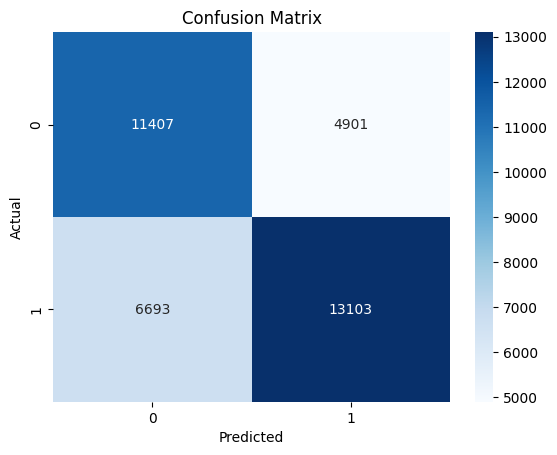

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Display the Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

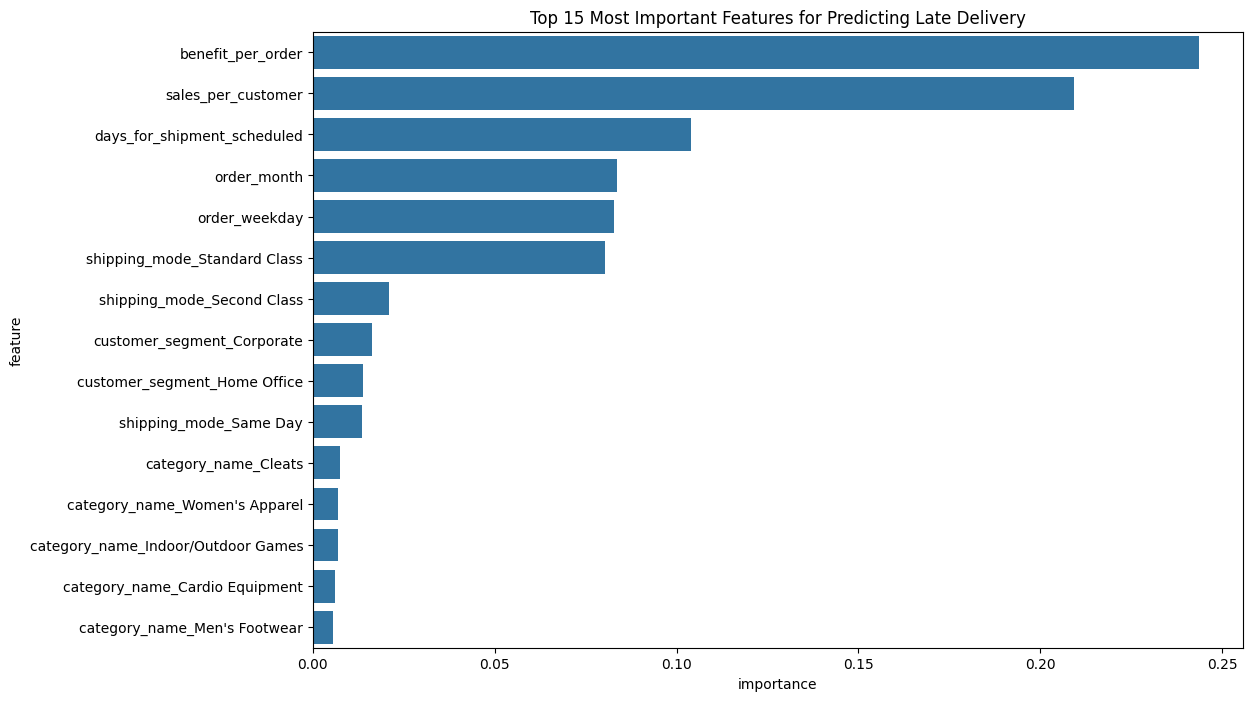

In [6]:
# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).head(15)

# Plot the most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Top 15 Most Important Features for Predicting Late Delivery')
plt.show()

In [7]:
# Save the model to the 'models' directory
joblib.dump(model, '../models/delivery_risk_model.joblib')

print("\nModel saved successfully as 'delivery_risk_model.joblib' in the 'models' folder.")


Model saved successfully as 'delivery_risk_model.joblib' in the 'models' folder.
